# Random Forest Model

The previous discussion on Decision Tree Model will give us intuition about a  Random Forest Model.  Random Forest focuses on feature selection and is a supervised learning algorithm. It can be used for both classification and regression. Random Forest helps us reduce the variance in decision trees.  It's a balance between high variance and high bias models.  It is a collection (ensemble) of decision trees. There is sample with replacement with each tree we fit.   There is a sample of features at each split, which helps to reduce variance.

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plot

## Example 1:  Vacation Dataset

In [2]:
# load data, this data has been stationarized
df1 = pd.read_csv('~/Desktop/section_4/vacation_lags_12months_features.csv', header=0)
df1.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0
1,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0
2,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0
3,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0,-16.0
4,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0,-16.0,-20.0


In [3]:
vacat = df1.values
# split into lagged variables (features) and original time series data (target)
X1= vacat[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 = vacat[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [ ]:
# Columns t-1 to t-12, which are the lagged variables
# X1

In [ ]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
# y1[0:10]

In [4]:
# Target Train-Test split
from pandas import read_csv

Y1 = y1
traintarget_size = int(len(Y1) * 0.75)   # Set split
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 174
Training Observations for Target: 130
Testing Observations for Target: 44


In [5]:
# Features Train-Test split

# X1
trainfeature_size = int(len(X1) * 0.75)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)]
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 174
Training Observations for feature: 130
Testing Observations for feature: 44


In [6]:
# Feature Selection with Random Forest

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)  # n_estimators is the number of trees in forest
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.9843322666927444
0.624796413046722


In [7]:
# Note: This cell will take some time to run
#  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, 
# but also the longer it will take to compute. 
# max_features is the number of features chosen at random at splits
# max_depth is the number of splits
# random_state will make your result reproducible

# Run grid search
# grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [17]}
grid = {'n_estimators': [200], 'max_depth': [10],'max_features': [2], 'random_state': [17]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  # You don't want negative value

# The best test score

0.7435472939146621 {'random_state': 17, 'n_estimators': 200, 'max_features': 2, 'max_depth': 10}


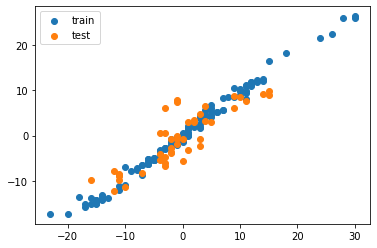

In [8]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=10, max_features=2, random_state=19)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plot.scatter(train_target, train_prediction, label='train')
plot.scatter(test_target, test_prediction, label='test')
plot.legend()
plot.show()

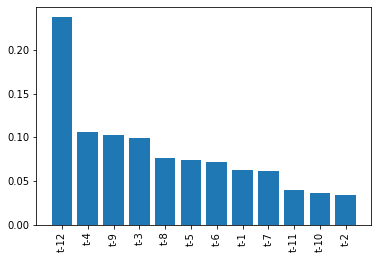

In [9]:
# Random Forest Model Feature Importance

# get column names
df1.columns
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x1 = range(len(importances))

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plot.bar(x1, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plot.xticks(rotation=90)
plot.show()

## Example 2: Furniture Dataset

In [10]:
# load data, this data has been stationarized
df2 = pd.read_csv('~/Desktop/section_4/furniture_lags_12months_features.csv', header=0)
df2.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.069088,-0.002419,0.033839,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869
1,-0.002419,0.033839,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474
2,0.033839,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474,0.038723
3,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474,0.038723,0.008674
4,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474,0.038723,0.008674,0.024956


### Split Data

In [11]:
furn = df2.values
# split into lagged variables (features) and original time series data (target)
X2= furn[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y2 = furn[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [ ]:
# Columns t-1 to t-12, which are the lagged variables
# X2

In [ ]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
# y2[0:10]

Below, you can alter the splits as 50-50, 60-40, 70-30, 75-25, 80-20, and 85-15, etc. 

In [12]:
# Target Train-Test split
from pandas import read_csv

Y2 = y2
traintarget_size = int(len(Y2) * 0.75)   # Set split
train_target, test_target = Y2[0:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y2)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 317
Training Observations for Target: 237
Testing Observations for Target: 80


In [13]:
# Features Train-Test split

trainfeature_size = int(len(X2) * 0.75)
train_feature, test_feature = X2[0:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 317
Training Observations for feature: 237
Testing Observations for feature: 80


In [14]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.9868574623992057
0.9102476672332983


One important aspect of tuning the hyperparameter is the number of features we sample at each split. This is the max_features in RandomForestRegressor from the sklearn library. For models like random forests that have randomness built-in, we also want to set the random_state. This is set for our results to be reproducible. We will use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [15]:
# Note: This cell will take some time to run
#  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, 
# but also the longer it will take to compute. 
# Run grid search
# grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
grid = {'n_estimators': [200], 'max_depth': [10], 'max_features': [7], 'random_state': [13]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  # You don't want negative value

# The best test score

0.9121835299273042 {'random_state': 13, 'n_estimators': 200, 'max_features': 7, 'max_depth': 10}


We want to evaluate performance of our best model to check how well or poorly we are doing. We've already seen the R-squares scores, but let's take a look at the scatter plot of predictions vs actual results using matplotlib. Perfect predictions would be a diagonal line from the lower left to the upper right.

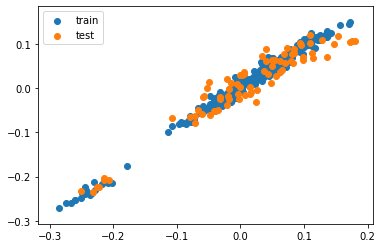

In [16]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=10, max_features = 7, random_state=13)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plot.scatter(train_target, train_prediction, label='train')
plot.scatter(test_target, test_prediction, label='test')
plot.legend()
plot.show()

Random Forest offers variable importance. This means that it will measure how much each feature contributes to our predictions. This is a way to reduce the number of features, particularly when dealing with a very large dataset.  You will then be able to hone in on the important variables (features). 

Be sure to use the  .feature_importances_ property which is available after you fit a model. It stores the feature importance scores. You will use the indices of the sorted feature importances using np.argsort() to make a bar plot of feature importances (sorted from greatest to least importance).

In [17]:
# Random Forest Feature Importance
# get column names
df2.columns

Index(['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1', 't'],
      dtype='object')

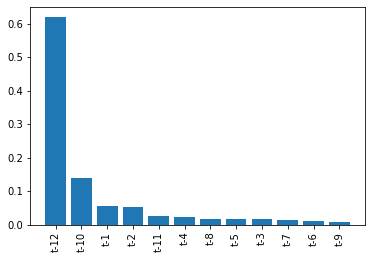

In [18]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plot.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plot.xticks(rotation=90)
plot.show()

Here, we can see how much each lag variable gives in explanatory power. It shows the explanatory power for each lag in sorted order.  It is similiar to the autocorrelation plot.

## Example 3: Bank of America Dataset

In [19]:
# load data, this data has been stationarized
df3 = pd.read_csv('~/Desktop/section_4/bac_lags_12months_features.csv', header=0)
df3.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,1.687537,1.469485,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093
1,1.469485,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426
2,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101
3,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101,1.941008
4,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101,1.941008,1.707245


In [20]:
# Split Data

bac = df3.values
# split into lagged variables (features) and original time series data (target)
X3= bac[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y3 = bac[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [21]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
y3[0:10]

array([1.28209293, 1.59542644, 1.69910097, 1.94100773, 1.70724475,
       1.65948939, 1.91634405, 1.76750135, 1.85432637, 1.70548344])

In [22]:
# Target Train-Test split
from pandas import read_csv

Y3 = y3
traintarget_size = int(len(Y3) * 0.75)   # Set split
train_target, test_target = Y3[0:traintarget_size], Y3[traintarget_size:len(Y3)]

print('Observations for Target: %d' % (len(Y3)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 345
Training Observations for Target: 258
Testing Observations for Target: 87


In [23]:
# Features Train-Test split

trainfeature_size = int(len(X3) * 0.75)
train_feature, test_feature = X3[0:trainfeature_size], X3[trainfeature_size:len(X3)]
print('Observations for feature: %d' % (len(X3)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 345
Training Observations for feature: 258
Testing Observations for feature: 87


In [24]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.9958364803460175
0.949064720871019


In [25]:
# Note: This cell will take some time to run
#  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, 
# but also the longer it will take to compute. 
# Run grid search
# grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
grid = {'n_estimators': [200], 'max_depth': [4], 'max_features': [8], 'random_state': [13]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  # You don't want negative value

# The best test score

0.956948680986422 {'random_state': 13, 'n_estimators': 200, 'max_features': 8, 'max_depth': 4}


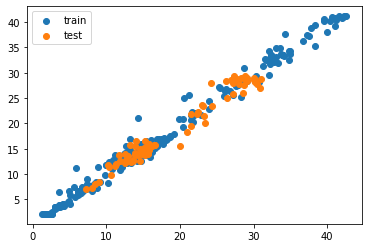

In [26]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=4, max_features = 8, random_state=13)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plot.scatter(train_target, train_prediction, label='train')
plot.scatter(test_target, test_prediction, label='test')
plot.legend()
plot.show()

In [27]:
# Random Forest Feature Importance
# get column names
df3.columns

Index(['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1', 't'],
      dtype='object')

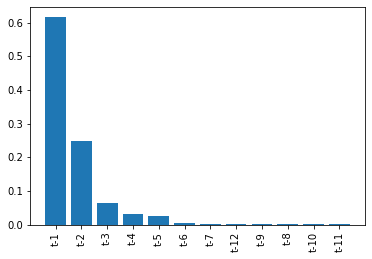

In [28]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plot.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plot.xticks(rotation=90)
plot.show()

## Example 4: J.P. Morgan Dataset

In [29]:
# load data
df4 = pd.read_csv('~/Desktop/section_4/jpm_lags_12months_features.csv', header=0)
df4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,3.083579,2.884144,2.884144,3.377686,3.223591,2.907553,2.733733,2.019471,1.319170,1.482032,1.427535,1.742920,2.191100
1,2.884144,2.884144,3.377686,3.223591,2.907553,2.733733,2.019471,1.319170,1.482032,1.427535,1.742920,2.191100,2.340254
2,2.884144,3.377686,3.223591,2.907553,2.733733,2.019471,1.319170,1.482032,1.427535,1.742920,2.191100,2.340254,2.761165
3,3.377686,3.223591,2.907553,2.733733,2.019471,1.319170,1.482032,1.427535,1.742920,2.191100,2.340254,2.761165,2.879019
4,3.223591,2.907553,2.733733,2.019471,1.319170,1.482032,1.427535,1.742920,2.191100,2.340254,2.761165,2.879019,2.909008


In [30]:
# split data

jpm = df4.values
# split into lagged variables and original time series
X4= jpm[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y4 = jpm[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [ ]:
# Columns t-1 to t-12, which are the lagged variables
# X4

In [ ]:
# Column t, which is the original time series
# y4[0:10]

In [31]:
# Target Train-Test split
from pandas import read_csv

Y4 = y4
traintarget_size = int(len(Y4) * 0.80)   # Set split
train_target, test_target = Y4[0:traintarget_size], Y4[traintarget_size:len(Y4)]

print('Observations for Target: %d' % (len(Y4)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 345
Training Observations for Target: 276
Testing Observations for Target: 69


In [32]:
# Features Train-Test split

trainfeature_size = int(len(X4) * 0.80)
train_feature, test_feature = X4[0:trainfeature_size], X4[trainfeature_size:len(X4)]
print('Observations for feature: %d' % (len(X4)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 345
Training Observations for feature: 276
Testing Observations for feature: 69


In [33]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.9948496152001673
-1.6135598659777242


In [34]:
# Note: This cell will take some time to run
#  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, 
# but also the longer it will take to compute. 

# Run grid search
# grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
grid = {'n_estimators': [200], 'max_depth': [7], 'max_features': [3], 'random_state': [13]}

test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  # You don't want negative value

# The best test score

-1.5603710361856487 {'random_state': 13, 'n_estimators': 200, 'max_features': 3, 'max_depth': 7}


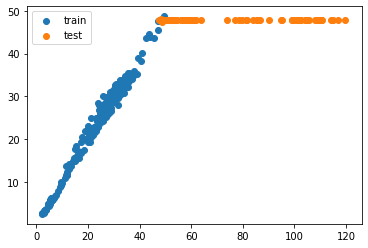

In [35]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=7, max_features = 3, random_state=13)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plot.scatter(train_target, train_prediction, label='train')
plot.scatter(test_target, test_prediction, label='test')
plot.legend()
plot.show()

In [36]:
# Random Forest Feature Importance
# get column names
df4.columns

Index(['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1', 't'],
      dtype='object')

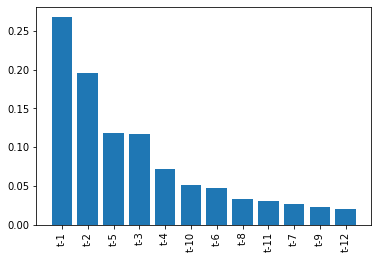

In [37]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plot.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plot.xticks(rotation=90)
plot.show()

## Example 5: Average Temperature Dataset

In [38]:
# load data
df5 = pd.read_csv('~/Desktop/section_4/temp_lags_12months_features.csv', header=0)
df5.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,8.250412,17.050412,23.950412,24.850412,15.650412,6.550412,-10.549588,-21.549588,-18.749588,-23.749588,-9.749588,-4.349588,11.750412
1,17.050412,23.950412,24.850412,15.650412,6.550412,-10.549588,-21.549588,-18.749588,-23.749588,-9.749588,-4.349588,11.750412,19.150412
2,23.950412,24.850412,15.650412,6.550412,-10.549588,-21.549588,-18.749588,-23.749588,-9.749588,-4.349588,11.750412,19.150412,23.250412
3,24.850412,15.650412,6.550412,-10.549588,-21.549588,-18.749588,-23.749588,-9.749588,-4.349588,11.750412,19.150412,23.250412,19.250412
4,15.650412,6.550412,-10.549588,-21.549588,-18.749588,-23.749588,-9.749588,-4.349588,11.750412,19.150412,23.250412,19.250412,18.750412


In [39]:
temp = df5.values
# split into lagged variables and original time series
X5= temp[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y5 = temp[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [ ]:
# Columns t-1 to t-12, which are the lagged variables
# X5

In [ ]:
# Column t, which is the original time series
# y5[0:10]

In [40]:
# Target Train-Test split
from pandas import read_csv

Y5 = y5
traintarget_size = int(len(Y5) * 0.80)   # Set split
train_target, test_target = Y5[0:traintarget_size], Y5[traintarget_size:len(Y5)]

print('Observations for Target: %d' % (len(Y5)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 957
Training Observations for Target: 765
Testing Observations for Target: 192


In [41]:
# Features Train-Test split

trainfeature_size = int(len(X5) * 0.80)
train_feature, test_feature = X5[0:trainfeature_size], X5[trainfeature_size:len(X5)]
print('Observations for feature: %d' % (len(X5)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 957
Training Observations for feature: 765
Testing Observations for feature: 192


In [42]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.9921215597475965
0.9381719818821498


In [43]:
# Note: This cell will take some time to run
#  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, 
# but also the longer it will take to compute. 
# Run grid search
#grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
grid = {'n_estimators': [200], 'max_depth': [3], 'max_features': [8], 'random_state': [13]}

test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  # You don't want negative value

# The best test score

0.928897863589804 {'random_state': 13, 'n_estimators': 200, 'max_features': 8, 'max_depth': 3}


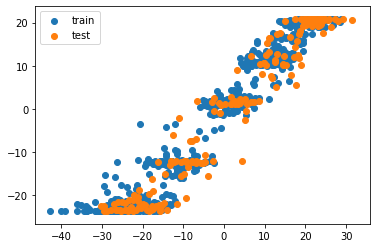

In [44]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features = 8, random_state=13)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plot.scatter(train_target, train_prediction, label='train')
plot.scatter(test_target, test_prediction, label='test')
plot.legend()
plot.show()

In [45]:
# Random Forest Feature Importance
# get column names
df5.columns

Index(['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1', 't'],
      dtype='object')

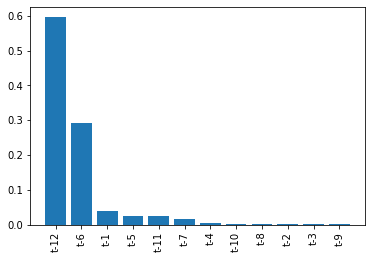

In [46]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plot.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plot.xticks(rotation=90)
plot.show()

In summary, we looked at a Random Forest model on a dataset that consisted of 12 lagged variables.  The dataset was split into features and target. It was further split according to a training and testing datasets. We determined that the best max_depth based on the best R-squared score on the test dataset model. We also determined the best number of features. The scatterplot displays both the predicted and actual values. 

In [ ]:
# End